In [1]:
# Importation des librairies nécessaires pour la visualisation des données
import plotly.express
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Récuperation du dataset au format csv
df= pd.read_csv("/weather.csv")

In [3]:
## Fonctions pour nettoyer des datas
# Renommer les colonnes
def data_preparation_0(df):
    for i in df.columns :
      l = i.split("_")
      if len(l)!=1:
        if len(l)>2:
          i1 = l[1]+l[2]
        else:
          i1 = l[1]
        i1 += "_"+l[0]
        df.rename(columns={i:i1},inplace=True)
    return df
# Reformatage des données
def data_preparation_1(df):
    df["id"] = df.index
    df_long = pd.wide_to_long(df.reset_index(), stubnames=[
       'precipitation', 'tempmean', 'tempmin',
       'tempmax','windspeed','pressure'], i=['DATE'], j='town',sep='_',suffix='.+')
    df_long.reset_index()
    df_long
    df3 = df_long[['precipitation', 'tempmean', 'tempmin',
       'tempmax','windspeed','pressure']]
    df3.reset_index(inplace=True)
    return df3
# Extraire les caractéristiques de la date
def extract_date_features(df):
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    df['day'] = df['DATE'].dt.day
    df['dayofweek_num']=df['DATE'].dt.dayofweek
    df['dayofweek_name']=df['DATE'].dt.day_name()
    #df = df.drop(columns='DATE')
    return df
# Ajouter les décalages pour les colonnes de température (tempmean et tempmax)
def day_in_Life(df, number):
    for i in range(1, number + 1):
        df[[f"tempmean{i}",f"tempmax{i}"]] = df.groupby(['town'])[["tempmean","tempmax"]].shift(i)
    return df


In [4]:
# Application des fonctions pour le nettoyage des data
df = data_preparation_0(df)
df = data_preparation_1(df)
df = extract_date_features(df)
df = day_in_Life(df,2)
unique_town_values = df['town'].unique().tolist()
unique_town_values
#nan_counts_per_column = df.isna().sum()
#nan_counts_per_column

['BASEL',
 'BUDAPEST',
 'DRESDEN',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MALMO',
 'MONTELIMAR',
 'MUENCHEN',
 'OSLO',
 'PERPIGNAN',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'ROMA']

In [ ]:
# Pipeline
num_selector = make_column_selector(dtype_include=np.number)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector))
reg = make_pipeline(tree_preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))
df_basel = df[df['town'] == 'TOURS']

In [ ]:
x = df[['precipitation','windspeed','year', 'month', 'day','pressure',	'tempmean1',	'tempmax1',	'tempmean2','tempmax2']]
y = df['tempmean']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
reg = reg.fit(x_train, y_train)

print("Train score", reg.score(x_train, y_train) *100)
print("Test score", reg.score(x_test, y_test) * 100)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')
y_pred

Train score 99.22368726487348
Test score 94.40917382307155
MSE: 4.031985978348358, MAE: 1.5404347231165483, R^2: 0.9440917382307156


array([22.265,  4.738, 11.915, ..., 10.78 ,  9.771,  3.617])

In [ ]:
import pickle

# Supposons que vous avez un modèle nommé 'modele'
modele = {"exemple": "Ceci est un modèle d'exemple"}

# Sauvegarder le modèle dans un fichier
with open('modele.pkl', 'wb') as fichier:
    pickle.dump(rfr_pipeline, fichier)

print("Modèle sauvegardé avec succès.")


Modèle sauvegardé avec succès.


In [ ]:
x = df[['precipitation','tempmin',
       'tempmax','windspeed','pressure', 'year', 'month', 'day']]
y = df['tempmean']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Modele
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Prédiction
y_pred = reg.predict(x_test)

In [ ]:
# Évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

# Visualisation

MSE: 0.9442041491669702, MAE: 0.6490135818717973, R^2: 0.9869074909935833


In [ ]:

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df = df.rename(columns={'DATE': 'ds', 'tempmean': 'y'})
#df.columns = ['ds', 'y']




In [ ]:
df_basel = df[df['town'] == 'TOURS']
df_basel = df_basel.dropna()
#df_basel.set_index('ds', inplace=True)
df_basel = df_basel[['ds', 'y',	'tempmean1',	'tempmax1',	'tempmean2','tempmax2','year'	,'month'	,'day', 'dayofweek_name', 'dayofweek_num']]
#df_basel = df_basel[['ds', 'y']]



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc643a1yb/3rqz5r6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc643a1yb/mq40ka8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9743', 'data', 'file=/tmp/tmpc643a1yb/3rqz5r6l.json', 'init=/tmp/tmpc643a1yb/mq40ka8y.json', 'output', 'file=/tmp/tmpc643a1yb/prophet_modelycuygsrd/prophet_model-20250113093330.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:33:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


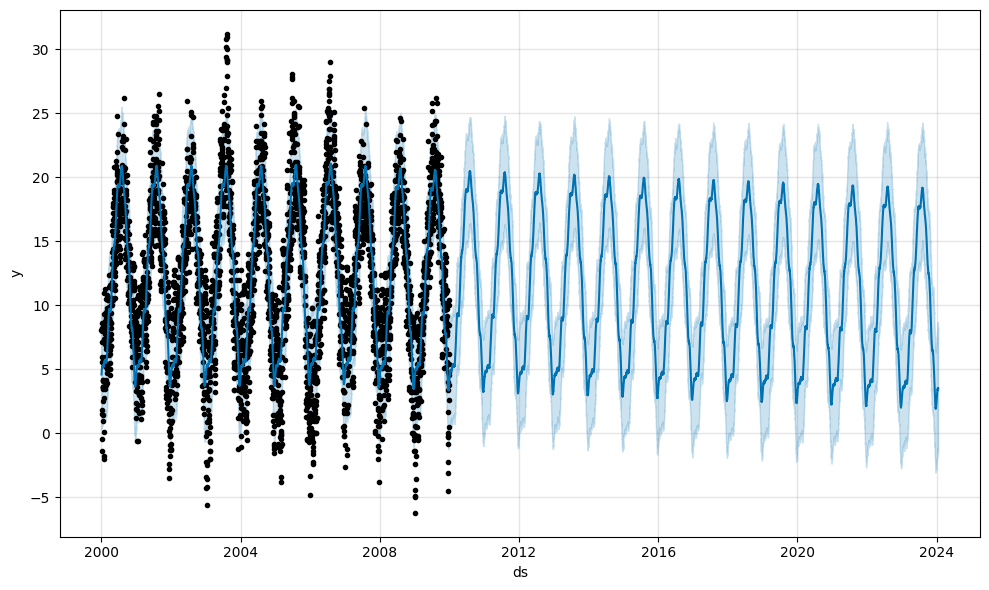

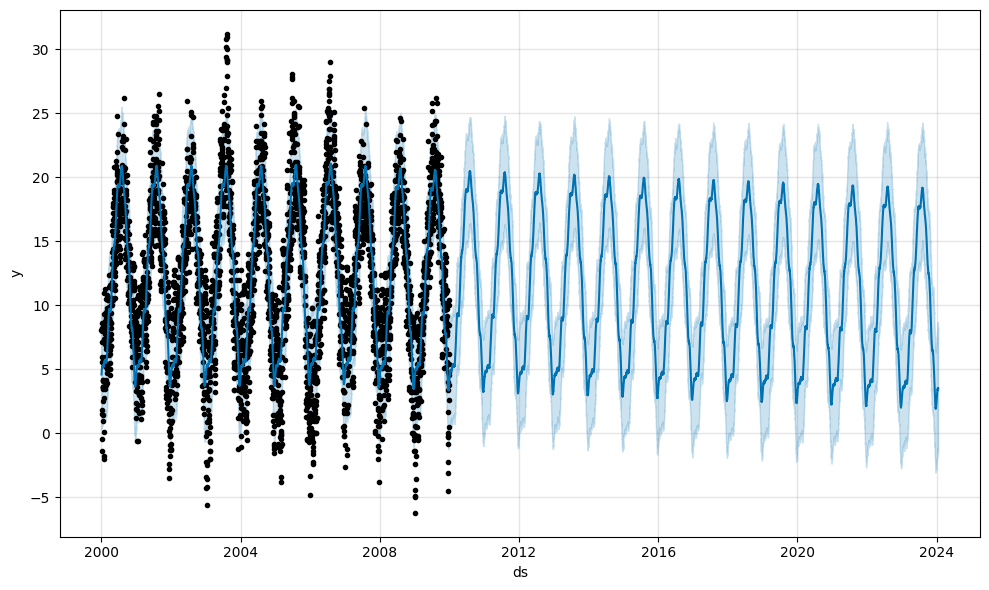

In [ ]:
# Test avec le modèle prophet
from prophet import Prophet
#df_basel = df_basel.dropna()
model = Prophet().fit(df_basel)
future = model.make_future_dataframe(periods=5128)
forecast = model.predict(future)
model.plot(forecast)


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]




,ds,yhat,yhat_lower,yhat_upper
0,2000-01-03,4.604079,0.362239,8.678384
1,2000-01-04,4.707505,0.565826,8.826517
2,2000-01-05,4.855006,0.280577,9.048121
3,2000-01-06,4.839189,0.719610,9.120488
4,2000-01-07,4.977686,0.730476,9.080382
...,...,...,...,...
8775,2024-01-12,3.470422,-1.108599,8.290716
8776,2024-01-13,3.555012,-1.168149,8.691684
8777,2024-01-14,3.509847,-1.587910,8.199372
8778,2024-01-15,3.479767,-1.563225,8.169957


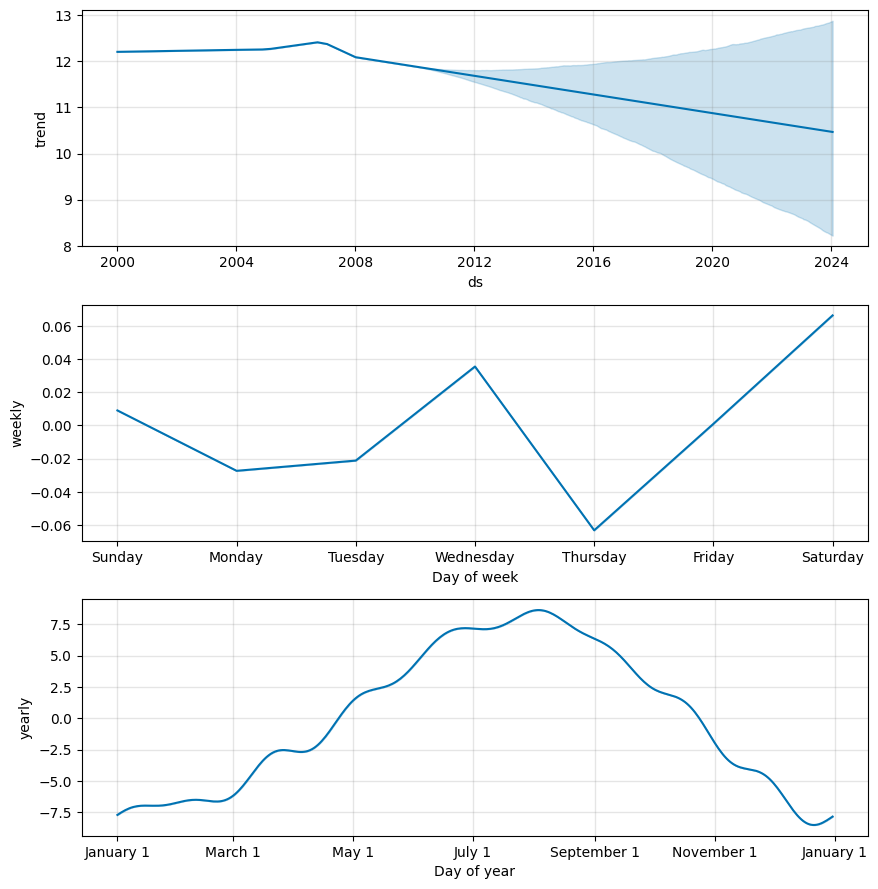

In [ ]:
fig2 = model.plot_components(forecast)
fig2.show()

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

train = df_basel.iloc[:-365]
test = df_basel.iloc[-365:]

model = Prophet(changepoint_prior_scale=0.001)
model.fit(train)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

forecast_test = forecast[forecast['ds'].isin(test['ds'])]

y_true = test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMS): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc643a1yb/fkhrphbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc643a1yb/kvmstowx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41286', 'data', 'file=/tmp/tmpc643a1yb/fkhrphbl.json', 'init=/tmp/tmpc643a1yb/kvmstowx.json', 'output', 'file=/tmp/tmpc643a1yb/prophet_modelaibdzj4z/prophet_model-20250113093639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:36:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:36:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 2.54
Root Mean Squared Error (RMS): 3.24
R² Score: 0.77


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3649,2009-12-28,7.047163,4.106045,10.070499
3650,2009-12-29,6.990595,3.655723,10.241480
3651,2009-12-30,6.938895,3.799351,10.080688
3652,2009-12-31,7.148475,4.078348,10.388036
3653,2010-01-01,7.156712,4.187336,10.272820


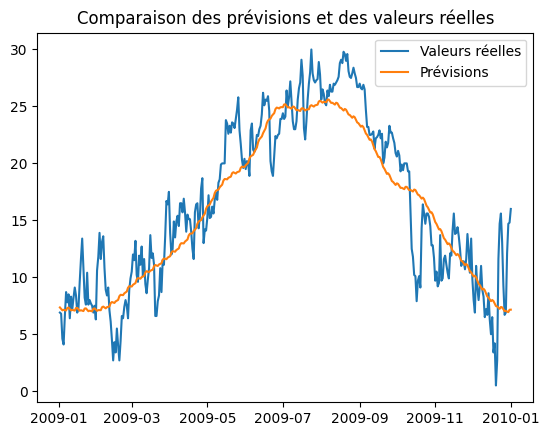

In [ ]:
import matplotlib.pyplot as plt

plt.plot(test['ds'], test['y'], label="Valeurs réelles")
plt.plot(forecast_test['ds'], forecast_test['yhat'], label="Prévisions")
plt.legend()
plt.title("Comparaison des prévisions et des valeurs réelles")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# 2. Entraîner le modèle sur l'ensemble d'entraînement
model = Prophet(changepoint_prior_scale=0.001)
model.fit(df_basel)
future = model.make_future_dataframe(periods=365, freq="D")
forecast = model.predict(future)

y_true = df_basel["y"][-365:].values
y_pred = forecast["yhat"][-365:].values
mae = mean_absolute_error(y_true, y_pred)




rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMS): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp008s2m0d/d1d5d1j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp008s2m0d/xh6rdwnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47317', 'data', 'file=/tmp/tmp008s2m0d/d1d5d1j1.json', 'init=/tmp/tmp008s2m0d/xh6rdwnb.json', 'output', 'file=/tmp/tmp008s2m0d/prophet_modeldti95eix/prophet_model-20250111164623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 2.44
Root Mean Squared Error (RMS): 3.12
R² Score: 0.78
